In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [40]:
TED = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/TED%20Talks/data.csv")
TED.head()

,title,author,date,views,likes,link
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,December 2021,404000,12000,https://ted.com/talks/ozawa_bineshi_albert_cli...
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,February 2022,214000,6400,https://ted.com/talks/sydney_iaukea_the_dark_h...
2,How play can spark new ideas for your business,Martin Reeves,September 2021,412000,12000,https://ted.com/talks/martin_reeves_how_play_c...
3,Why is China appointing judges to combat clima...,James K. Thornton,October 2021,427000,12000,https://ted.com/talks/james_k_thornton_why_is_...
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,October 2021,2400,72,https://ted.com/talks/mahendra_singhi_cement_s...


In [41]:
TED.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5440 entries, 0 to 5439
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   5440 non-null   object
 1   author  5439 non-null   object
 2   date    5440 non-null   object
 3   views   5440 non-null   int64 
 4   likes   5440 non-null   int64 
 5   link    5440 non-null   object
dtypes: int64(2), object(4)
memory usage: 255.1+ KB


In [42]:
TED.dropna(how='any',inplace=True)
TED.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5439 entries, 0 to 5439
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   5439 non-null   object
 1   author  5439 non-null   object
 2   date    5439 non-null   object
 3   views   5439 non-null   int64 
 4   likes   5439 non-null   int64 
 5   link    5439 non-null   object
dtypes: int64(2), object(4)
memory usage: 297.4+ KB


In [43]:
TED['Month'] = TED['date'].apply(lambda x: x.split(' ')[0])
TED['Year'] = TED['date'].apply(lambda x: x.split(' ')[1])
TED.drop('date',axis=1,inplace=True)
TED.head()

,title,author,views,likes,link,Month,Year
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,404000,12000,https://ted.com/talks/ozawa_bineshi_albert_cli...,December,2021
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,214000,6400,https://ted.com/talks/sydney_iaukea_the_dark_h...,February,2022
2,How play can spark new ideas for your business,Martin Reeves,412000,12000,https://ted.com/talks/martin_reeves_how_play_c...,September,2021
3,Why is China appointing judges to combat clima...,James K. Thornton,427000,12000,https://ted.com/talks/james_k_thornton_why_is_...,October,2021
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,2400,72,https://ted.com/talks/mahendra_singhi_cement_s...,October,2021


In [44]:
TED["title"].value_counts()

Climate action needs new frontline leadership                          1
Does the media have a "duty of care"?                                  1
Puppies! Now that I’ve got your attention, complexity theory           1
What percentage of your brain do you use?                              1
Meet a young entrepreneur, cartoonist, designer, activist ...          1
                                                                      ..
Is war between China and the US inevitable?                            1
How tech companies deceive you into giving up your data and privacy    1
How to fight prejudice through policy conversations                    1
How an algorithm can fight election bias so every vote counts          1
Averting the climate crisis                                            1
Name: title, Length: 5439, dtype: int64

In [45]:
TED['Title_Length'] = TED['title'].apply(lambda x: len(x.split(' ')))
TED.head()

,title,author,views,likes,link,Month,Year,Title_Length
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,404000,12000,https://ted.com/talks/ozawa_bineshi_albert_cli...,December,2021,6
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,214000,6400,https://ted.com/talks/sydney_iaukea_the_dark_h...,February,2022,8
2,How play can spark new ideas for your business,Martin Reeves,412000,12000,https://ted.com/talks/martin_reeves_how_play_c...,September,2021,9
3,Why is China appointing judges to combat clima...,James K. Thornton,427000,12000,https://ted.com/talks/james_k_thornton_why_is_...,October,2021,9
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,2400,72,https://ted.com/talks/mahendra_singhi_cement_s...,October,2021,10


In [46]:
TED.drop('link',axis=1,inplace=True)
TED.head()

,title,author,views,likes,Month,Year,Title_Length
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,404000,12000,December,2021,6
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,214000,6400,February,2022,8
2,How play can spark new ideas for your business,Martin Reeves,412000,12000,September,2021,9
3,Why is China appointing judges to combat clima...,James K. Thornton,427000,12000,October,2021,9
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,2400,72,October,2021,10


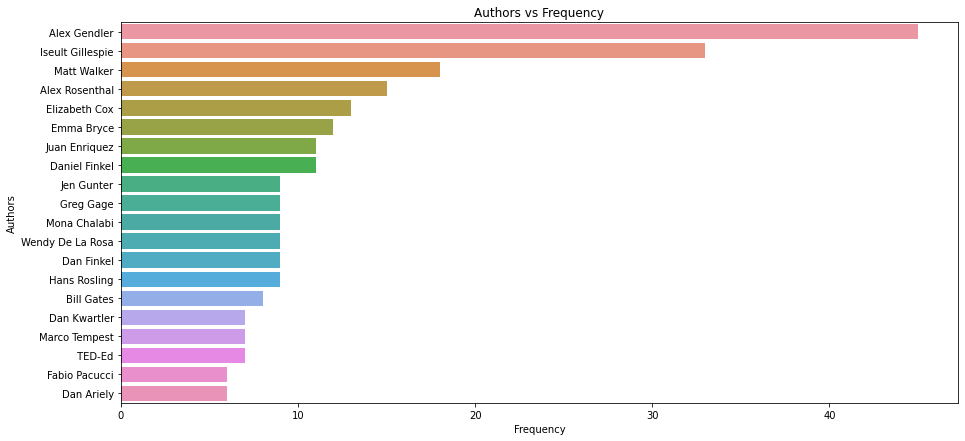

In [47]:
TED_Authors = pd.DataFrame(TED['author'].value_counts())
Frequent_Authors = TED_Authors.head(20)
Frequent_Authors['Frequency'] = Frequent_Authors['author']
Frequent_Authors.drop('author',axis=1,inplace=True)
Frequent_Authors.head()

plt.figure(figsize=(15,7))
sns.barplot(x=Frequent_Authors.Frequency,y=Frequent_Authors.index)
plt.title('Authors vs Frequency')
plt.xlabel('Frequency')
plt.ylabel('Authors')
plt.show()

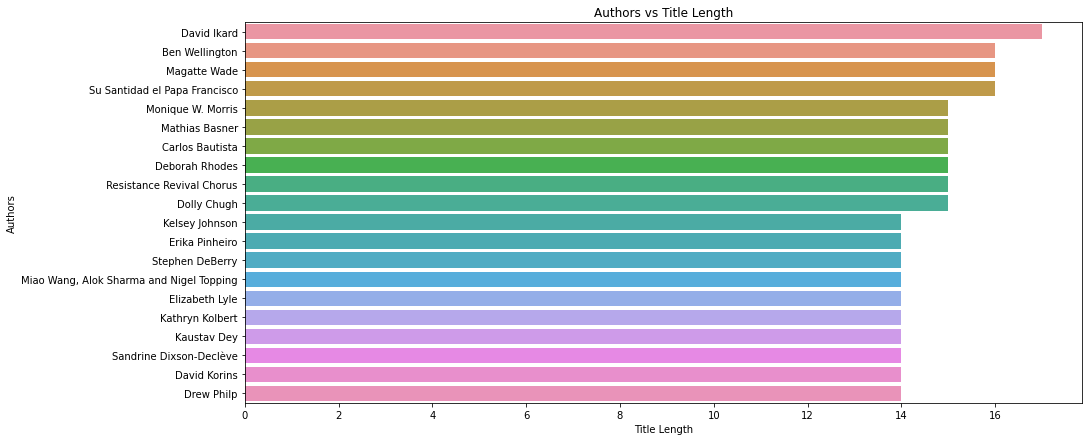

In [48]:
Temp = TED.groupby(by='author').mean()
Temp.sort_values('Title_Length',ascending=False,inplace=True)
Temp = Temp.head(20)

plt.figure(figsize=(15,7))
sns.barplot(x=Temp.Title_Length,y=Temp.index)
plt.title('Authors vs Title Length')
plt.xlabel('Title Length')
plt.ylabel('Authors')
plt.show()

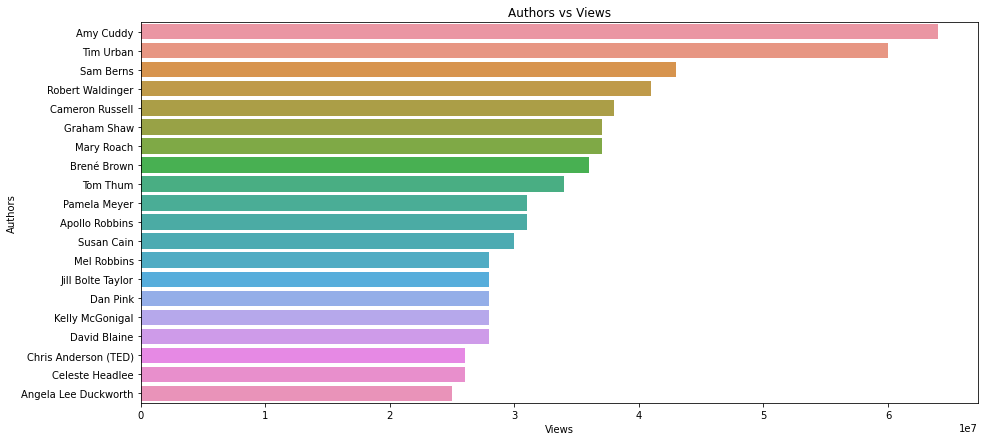

In [49]:
Temp = TED.groupby(by='author').mean()
Temp.sort_values('views',ascending=False,inplace=True)
Temp = Temp.head(20)

plt.figure(figsize=(15,7))
sns.barplot(x=Temp.views,y=Temp.index)
plt.title('Authors vs Views')
plt.xlabel('Views')
plt.ylabel('Authors')
plt.show()

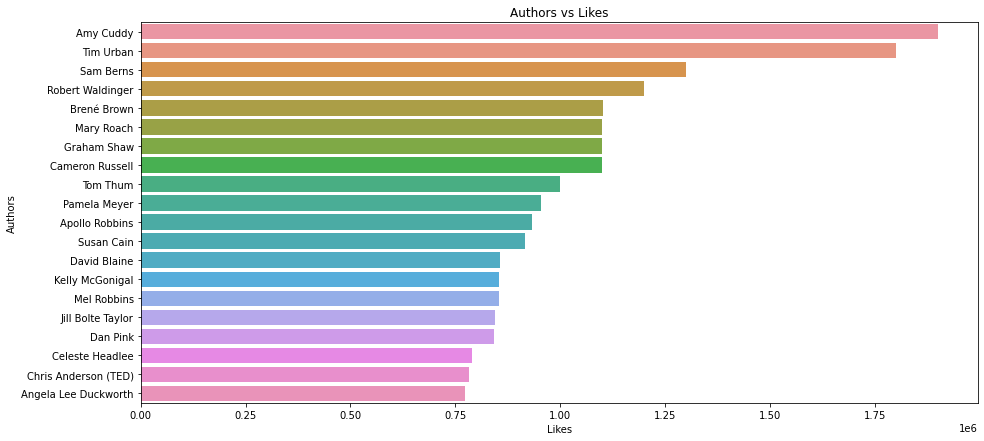

In [50]:
Temp = TED.groupby(by='author').mean()
Temp.sort_values('likes',ascending=False,inplace=True)
Temp = Temp.head(20)

plt.figure(figsize=(15,7))
sns.barplot(x=Temp.likes,y=Temp.index)
plt.title('Authors vs Likes')
plt.xlabel('Likes')
plt.ylabel('Authors')
plt.show()

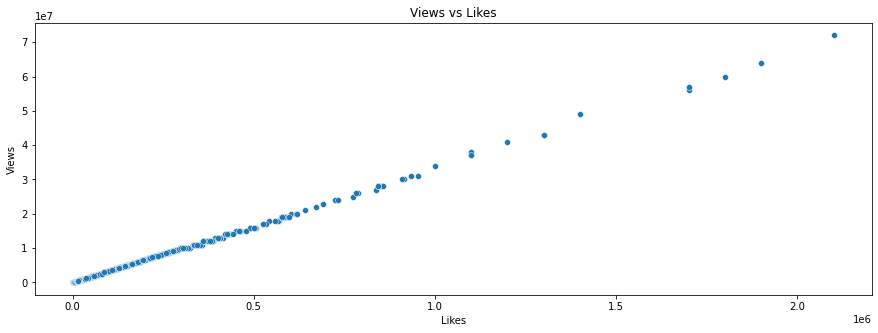

In [51]:
plt.figure(figsize=(15,5))
sns.scatterplot(x=TED.likes,y=TED.views)
plt.title('Views vs Likes')
plt.xlabel('Likes')
plt.ylabel('Views')
plt.show()

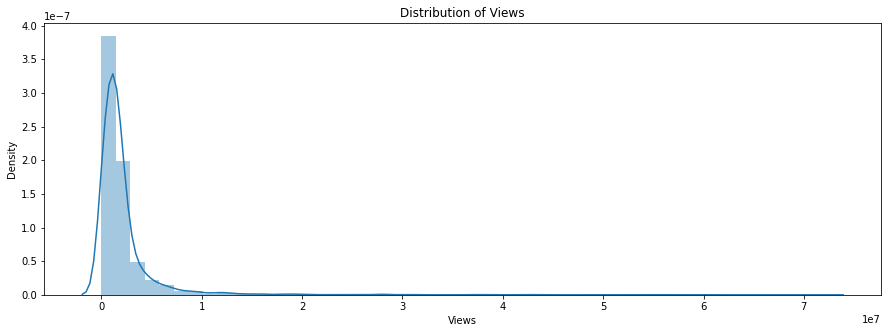

In [52]:
plt.figure(figsize=(15,5))
sns.distplot(TED['views'])
plt.title('Distribution of Views')
plt.xlabel('Views')
plt.show()

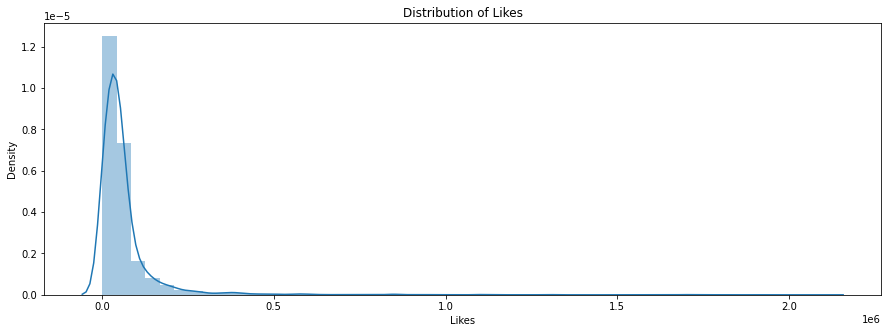

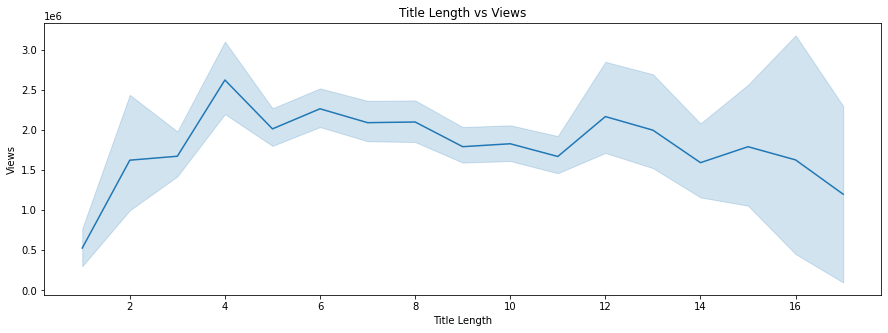

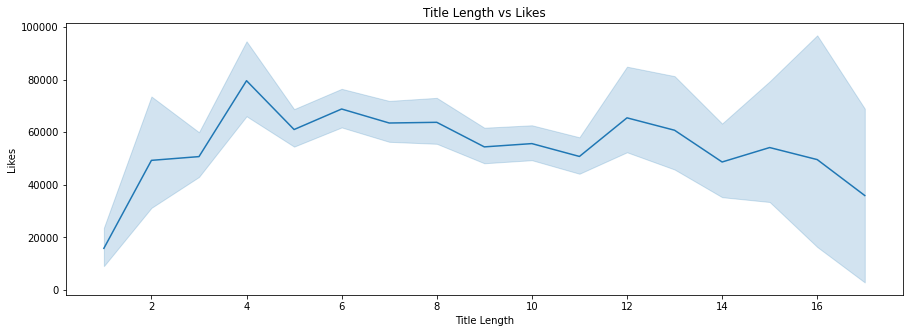

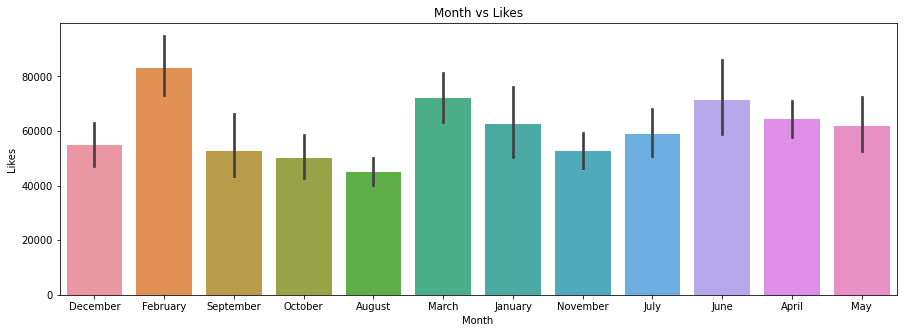

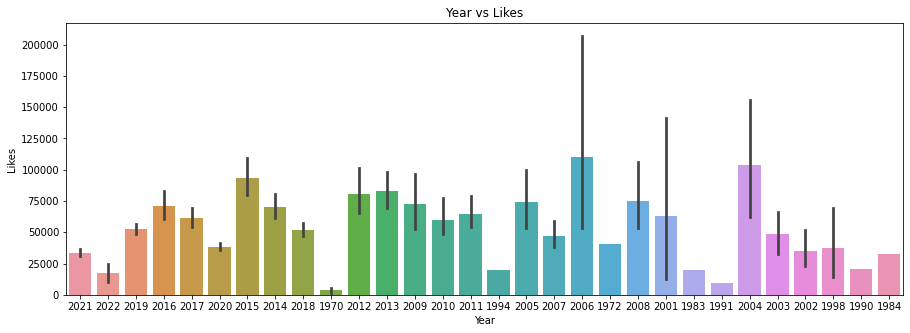

,title,author,views,likes,Month,Year,Title_Length
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,404000,12000,December,2021,6
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,214000,6400,February,2022,8
2,How play can spark new ideas for your business,Martin Reeves,412000,12000,September,2021,9
3,Why is China appointing judges to combat clima...,James K. Thornton,427000,12000,October,2021,9
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,2400,72,October,2021,10


In [53]:
plt.figure(figsize=(15,5))
sns.distplot(TED['likes'])
plt.title('Distribution of Likes')
plt.xlabel('Likes')
plt.show()

plt.figure(figsize=(15,5))
sns.lineplot(x=TED.Title_Length,y=TED.views)
plt.title('Title Length vs Views')
plt.xlabel('Title Length')
plt.ylabel('Views')
plt.show()

plt.figure(figsize=(15,5))
sns.lineplot(x=TED.Title_Length,y=TED.likes)
plt.title('Title Length vs Likes')
plt.xlabel('Title Length')
plt.ylabel('Likes')
plt.show()

plt.figure(figsize=(15,5))
sns.barplot(x=TED.Month,y=TED.likes)
plt.title('Month vs Likes')
plt.xlabel('Month')
plt.ylabel('Likes')
plt.show()

plt.figure(figsize=(15,5))
sns.barplot(x=TED.Year,y=TED.likes)
plt.title('Year vs Likes')
plt.xlabel('Year')
plt.ylabel('Likes')
plt.show()

TED.head()

In [54]:
Words =  list()

for i in list(TED['title']):
    for j in i.split(' '):
        Words.append(j.upper())

Word_Freq = dict()
for i in Words:
    Word_Freq[i] = Words.count(i)
Word_Freq = pd.DataFrame({'Word':list(Word_Freq.keys()),'Frequency':list(Word_Freq.values())})
Word_Freq.sort_values(by='Frequency',ascending=False,inplace=True)
Word_Freq.head(85)

,Word,Frequency
6,THE,2395
9,OF,1213
62,A,1140
25,TO,1114
12,HOW,1035
...,...,...
1897,LET'S,48
193,IF,48
77,GOOD,48
930,BY,47


In [55]:
syncategorematic = list(Word_Freq[Word_Freq.Frequency>152].Word) + ['MY','DO','ARE','IT','NEW','US','BE','AT','WHO','THIS','ME','IF']
Word_Freq['Frequency'].describe()

count    7805.000000
mean        4.845356
std        41.219525
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max      2395.000000
Name: Frequency, dtype: float64

In [56]:
for i in [0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99]:
    print(Word_Freq['Frequency'].quantile(i))

3.0
6.0
7.0
7.0
9.0
10.0
12.0
14.0
19.0
27.0
48.0


In [57]:
Temp = Word_Freq.copy()
Word_Freq = Word_Freq[Word_Freq.Frequency>=48]
Word_Freq.tail()

,Word,Frequency
708,LOVE,48
264,ME,48
1897,LET'S,48
193,IF,48
77,GOOD,48


In [58]:
Final_Words = list(Word_Freq['Word'])
for i in syncategorematic:
    Final_Words.remove(i)
len(Final_Words)

47

In [59]:
for i in Final_Words:
    TED[i] = TED['title'].apply(lambda x: 1 if i in x.upper().split(' ') else 0)
TED.drop('title',axis=1,inplace=True)
TED.head()

,author,views,likes,Month,Year,Title_Length,LIFE,FUTURE,WORLD,COULD,...,RIDDLE?,DON'T,AS,SECRET,DOES,INTO,TEACH,LOVE,LET'S,GOOD
0,Ozawa Bineshi Albert,404000,12000,December,2021,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Sydney Iaukea,214000,6400,February,2022,8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Martin Reeves,412000,12000,September,2021,9,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,James K. Thornton,427000,12000,October,2021,9,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Mahendra Singhi,2400,72,October,2021,10,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
TED_Words = TED.drop(['author','Month','Year','Title_Length'],axis=1)
TED_Words.head()

,views,likes,LIFE,FUTURE,WORLD,COULD,SHOULD,CHANGE,HELP,MAKE,...,RIDDLE?,DON'T,AS,SECRET,DOES,INTO,TEACH,LOVE,LET'S,GOOD
0,404000,12000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,214000,6400,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,412000,12000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,427000,12000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2400,72,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


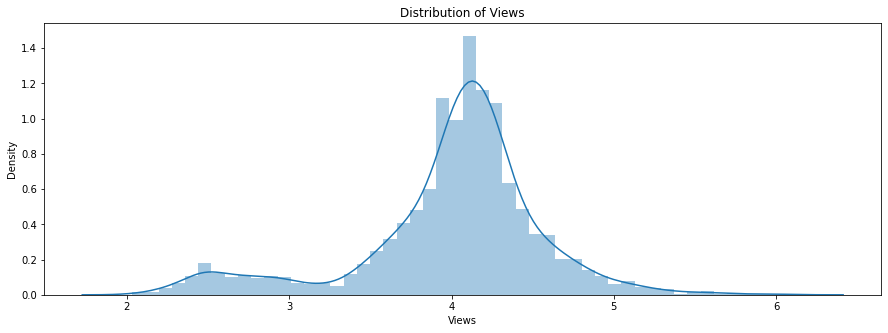

In [61]:
TED_Words['views'] = TED_Words['views'].apply(lambda x: x**0.1)
TED_Words['likes'] = TED_Words['likes'].apply(lambda x: x**0.1)
plt.figure(figsize=(15,5))
sns.distplot(TED_Words['views'])
plt.title('Distribution of Views')
plt.xlabel('Views')
plt.show()

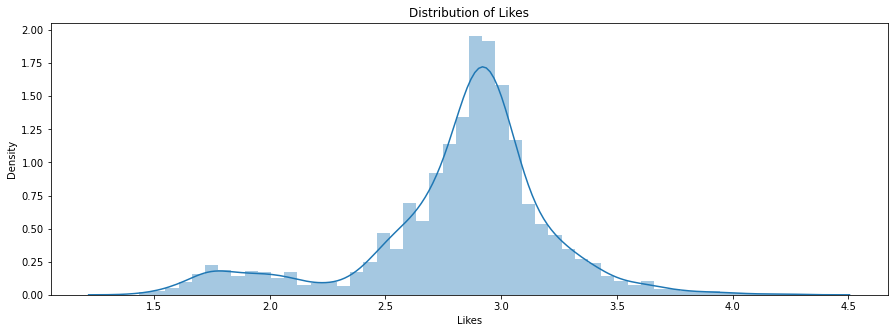

In [62]:
plt.figure(figsize=(15,5))
sns.distplot(TED_Words['likes'])
plt.title('Distribution of Likes')
plt.xlabel('Likes')
plt.show()

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, accuracy_score
Feature_Importance = pd.DataFrame()
for i in ['views','likes']:
    X = TED_Words.drop(['views','likes'],axis=1)
    y = TED_Words[i]
    X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,random_state=100)
    
    Model = RandomForestRegressor(random_state=100,n_jobs=-1)
        
    params = {'n_estimators':[200],
              'min_samples_leaf':[50,70,100,150,200],
              'max_depth':[2,5,10,15,20,30,40],
              'max_features':[0.1,0.2,0.3,0.4,0.5]}
    
    grid_search = GridSearchCV(estimator=Model,param_grid=params,n_jobs=-1,verbose=1,scoring='r2')
    grid_search.fit(X_train,y_train)
    
    Model_best = grid_search.best_estimator_
    
    y_train_pred = Model_best.predict(X_train)
    y_test_pred = Model_best.predict(X_test)
    
    print('Train Accuracy :',r2_score(y_train,y_train_pred))
    print('Test Accuracy :',r2_score(y_test,y_test_pred))
    
    Feature_Importance['Feature'] = X_train.columns
    Feature_Importance[i] = Model_best.feature_importances_

Fitting 5 folds for each of 175 candidates, totalling 875 fits
Train Accuracy : 0.0008453082339814344
Test Accuracy : 0.0001308135685292866
Fitting 5 folds for each of 175 candidates, totalling 875 fits
Train Accuracy : 0.0008480954178091693
Test Accuracy : 0.00012949826131469777


In [64]:
Feature_Importance = Feature_Importance.sort_values(by=['views','likes'],ascending=False)
Feature_Importance.set_index('Feature',inplace=True)
Feature_Importance.head()

,views,likes
Feature,,
LIFE,0.389049,0.399049
FUTURE,0.312055,0.309683
WORLD,0.248083,0.240103
CLIMATE,0.019814,0.019885
CHANGE,0.017660,0.017919


In [65]:
TED_Words["likes"].describe()

count    5439.000000
mean        2.820506
std         0.404875
min         1.434895
25%         2.692173
50%         2.892533
75%         3.028945
max         4.287676
Name: likes, dtype: float64

In [66]:
TED_Words['High_Views'] = TED_Words['views'].apply(lambda x: 1 if x>3.05 else 0)
TED_Words['High_Likes'] = TED_Words['likes'].apply(lambda x: 1 if x>2.14 else 0)
TED_Words['High_Views'].value_counts()

1    4948
0     491
Name: High_Views, dtype: int64

In [67]:
TED_Words['High_Likes'].value_counts()

1    4948
0     491
Name: High_Likes, dtype: int64

In [68]:
Feature_Importance = pd.DataFrame()
for i in ['High_Views','High_Likes']:
    X = TED_Words.drop(['High_Views','High_Likes','views','likes'],axis=1)
    y = TED_Words[i]
    X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,random_state=100)
    
    Model = RandomForestClassifier(random_state=100,n_jobs=-1)
        
    params = {'n_estimators':[200],
              'min_samples_leaf':[50,70,100,150,200],
              'max_depth':[2,5,10,15,20,30,40],
              'max_features':[0.1,0.2,0.3,0.4,0.5]}
    
    grid_search = GridSearchCV(estimator=Model,param_grid=params,n_jobs=-1,verbose=1,scoring='accuracy')
    grid_search.fit(X_train,y_train)
    
    Model_best = grid_search.best_estimator_
    
    y_train_pred = Model_best.predict(X_train)
    y_test_pred = Model_best.predict(X_test)
    
    print('Train Accuracy :',accuracy_score(y_train,y_train_pred))
    print('Test Accuracy :',accuracy_score(y_test,y_test_pred))
    
    Feature_Importance['Feature'] = X_train.columns
    Feature_Importance[i] = Model_best.feature_importances_

Fitting 5 folds for each of 175 candidates, totalling 875 fits
Train Accuracy : 0.910428158655109
Test Accuracy : 0.9080882352941176
Fitting 5 folds for each of 175 candidates, totalling 875 fits
Train Accuracy : 0.910428158655109
Test Accuracy : 0.9080882352941176


In [69]:
Feature_Importance = Feature_Importance.sort_values(by=['High_Views','High_Likes'],ascending=False)
Feature_Importance.set_index('Feature',inplace=True)
Feature_Importance.head(5)

,High_Views,High_Likes
Feature,,
LIFE,0.387304,0.387304
FUTURE,0.258819,0.258819
WORLD,0.247706,0.247706
CHANGE,0.106171,0.106171
COULD,0.000000,0.000000


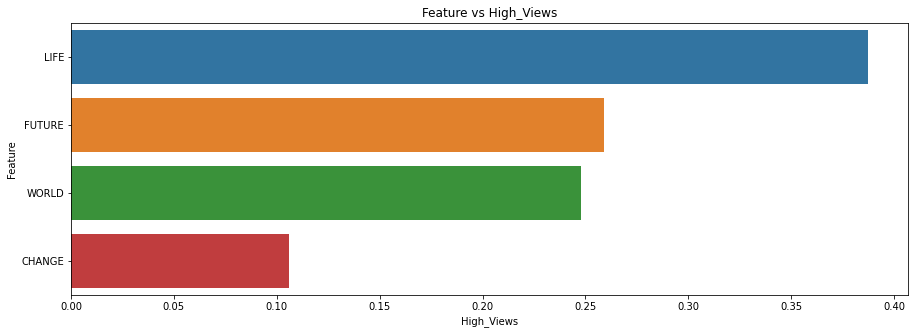

In [70]:
Feature_Importance = Feature_Importance[Feature_Importance.High_Views>0]
plt.figure(figsize=(15,5))
sns.barplot(x=Feature_Importance.High_Views,y=Feature_Importance.index)
plt.title('Feature vs High_Views')
plt.xlabel('High_Views')
plt.ylabel('Feature')
plt.show()

In [71]:
from scipy.stats import pearsonr
TED_Words_Correlations = dict()
TED_Words.drop(['High_Views','High_Likes'],axis=1)
lis = list(TED_Words.columns)
lis.remove('views')
lis.remove('likes')

for i in lis:
    TED_Words_Correlations[i] = [pearsonr(TED_Words['views'],TED_Words[i])[0],pearsonr(TED_Words['likes'],TED_Words[i])[0]]

TED_Words_Correlations = pd.DataFrame({'Feature':list(TED_Words_Correlations.keys()),'Correlations':list(TED_Words_Correlations.values())})
TED_Words_Correlations.set_index('Feature',inplace=True)
TED_Words_Correlations.head()

,Correlations
Feature,
LIFE,"[0.019173665572592355, 0.01952298063833079]"
FUTURE,"[-0.02635752161948399, -0.02604946615601721]"
WORLD,"[-0.009405337936754167, -0.009154241810860312]"
COULD,"[-0.006484410585623484, -0.0062573087165457035]"
SHOULD,"[0.003037679253960121, 0.0030690675001318916]"


In [72]:
TED_Words_Correlations['Views'] = TED_Words_Correlations['Correlations'].apply(lambda x: x[0])
TED_Words_Correlations['Likes'] = TED_Words_Correlations['Correlations'].apply(lambda x: x[1])
TED_Words_Correlations.drop('Correlations',axis=1,inplace=True)
TED_Words_Correlations.head()

,Views,Likes
Feature,,
LIFE,0.019174,0.019523
FUTURE,-0.026358,-0.026049
WORLD,-0.009405,-0.009154
COULD,-0.006484,-0.006257
SHOULD,0.003038,0.003069


In [73]:
TED_Words_Correlations.sort_values(['Views','Likes'],ascending=False).head()

,Views,Likes
Feature,,
High_Views,0.757483,0.754640
High_Likes,0.757483,0.754640
RIDDLE?,0.075892,0.075848
SOLVE,0.068946,0.069151
BRAIN,0.051899,0.052214


In [74]:
TED_Pred = TED[['views','likes','Year','Month','Title_Length']]
TED_Pred.head()

,views,likes,Year,Month,Title_Length
0,404000,12000,2021,December,6
1,214000,6400,2022,February,8
2,412000,12000,2021,September,9
3,427000,12000,2021,October,9
4,2400,72,2021,October,10


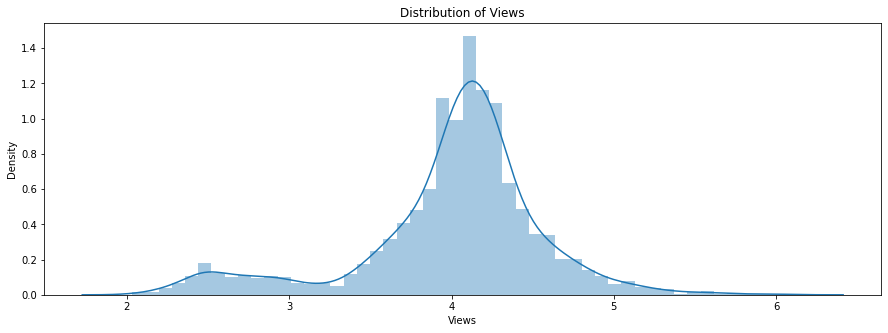

In [75]:
TED_Pred['views'] = TED_Pred['views'].apply(lambda x: x**0.1)
TED_Pred['likes'] = TED_Pred['likes'].apply(lambda x: x**0.1)
plt.figure(figsize=(15,5))
sns.distplot(TED_Pred['views'])
plt.title('Distribution of Views')
plt.xlabel('Views')
plt.show()

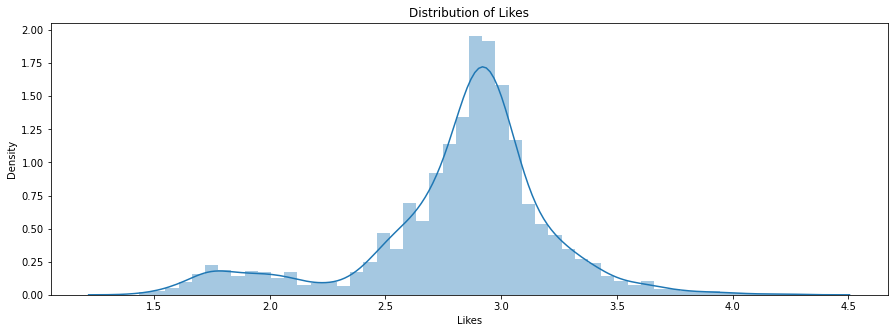

In [76]:
plt.figure(figsize=(15,5))
sns.distplot(TED_Pred['likes'])
plt.title('Distribution of Likes')
plt.xlabel('Likes')
plt.show()

In [77]:
temp = pd.get_dummies(TED_Pred['Year'],drop_first=False)
TED_Pred = pd.concat([temp,TED_Pred],axis=1)
TED_Pred.drop('Year',axis=1,inplace=True)

temp = pd.get_dummies(TED_Pred['Month'],drop_first=False)
TED_Pred = pd.concat([temp,TED_Pred],axis=1)
TED_Pred.drop('Month',axis=1,inplace=True)
TED_Pred.head()

,April,August,December,February,January,July,June,March,May,November,...,2016,2017,2018,2019,2020,2021,2022,views,likes,Title_Length
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,3.636119,2.558104,6
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,3.412254,2.402249,8
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,3.643256,2.558104,9
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,3.656308,2.558104,9
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,2.177816,1.533675,10


In [78]:
Feature_Importance = pd.DataFrame()
for i in ['views','likes']:
    X = TED_Pred.drop(['views','likes'],axis=1)
    y = TED_Pred[i]
    X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,random_state=100)
    
    Model = RandomForestRegressor(random_state=100,n_jobs=-1)
        
    params = {'n_estimators':[200],
              'min_samples_leaf':[50,70,100,150,200],
              'max_depth':[2,5,10,15,20,25,30],
              'max_features':[0.2,0.3,0.4,0.5]}
    
    grid_search = GridSearchCV(estimator=Model,param_grid=params,n_jobs=-1,verbose=1,scoring='r2')
    grid_search.fit(X_train,y_train)
    
    Model_best = grid_search.best_estimator_
    
    y_train_pred = Model_best.predict(X_train)
    y_test_pred = Model_best.predict(X_test)
    
    print('Train Accuracy :',r2_score(y_train,y_train_pred))
    print('Test Accuracy :',r2_score(y_test,y_test_pred))
    
    Feature_Importance['Feature'] = X_train.columns
    Feature_Importance[i] = Model_best.feature_importances_

Fitting 5 folds for each of 140 candidates, totalling 700 fits
Train Accuracy : 0.08723546710377261
Test Accuracy : 0.05086002068786677
Fitting 5 folds for each of 140 candidates, totalling 700 fits
Train Accuracy : 0.08698422331694855
Test Accuracy : 0.050648887638418016


In [79]:
Feature_Importance = Feature_Importance.sort_values(by=['views','likes'],ascending=False)
Feature_Importance.set_index('Feature',inplace=True)
Feature_Importance.head()

,views,likes
Feature,,
November,0.151028,0.150676
Title_Length,0.132878,0.132360
October,0.123945,0.123403
February,0.120334,0.115954
September,0.110654,0.111369


In [80]:
TED_Pred['High_Views'] = TED_Pred['views'].apply(lambda x: 1 if x>3.05 else 0)
TED_Pred['High_Likes'] = TED_Pred['likes'].apply(lambda x: 1 if x>2.14 else 0)
Feature_Importance = pd.DataFrame()
for i in ['High_Views','High_Likes']:
    X = TED_Pred.drop(['High_Views','High_Likes','views','likes'],axis=1)
    y = TED_Pred[i]
    X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,random_state=100)
    
    Model = RandomForestClassifier(random_state=100,n_jobs=-1)
        
    params = {'n_estimators':[200],
              'min_samples_leaf':[50,70,100,150,200],
              'max_depth':[2,5,10,15,20,25,30],
              'max_features':[0.2,0.3,0.4,0.5]}
    
    grid_search = GridSearchCV(estimator=Model,param_grid=params,n_jobs=-1,verbose=1,scoring='accuracy')
    grid_search.fit(X_train,y_train)
    
    Model_best = grid_search.best_estimator_
    
    y_train_pred = Model_best.predict(X_train)
    y_test_pred = Model_best.predict(X_test)
    
    print('Train Accuracy :',accuracy_score(y_train,y_train_pred))
    print('Test Accuracy :',accuracy_score(y_test,y_test_pred))
    
    Feature_Importance['Feature'] = X_train.columns
    Feature_Importance[i] = Model_best.feature_importances_

Fitting 5 folds for each of 140 candidates, totalling 700 fits
Train Accuracy : 0.910428158655109
Test Accuracy : 0.9080882352941176
Fitting 5 folds for each of 140 candidates, totalling 700 fits
Train Accuracy : 0.910428158655109
Test Accuracy : 0.9080882352941176


In [81]:
Feature_Importance = Feature_Importance.sort_values(by=['High_Views','High_Likes'],ascending=False)
Feature_Importance.set_index('Feature',inplace=True)
Feature_Importance.head()

,High_Views,High_Likes
Feature,,
2018,0.238674,0.238674
February,0.163646,0.163646
November,0.144645,0.144645
September,0.113599,0.113599
October,0.087781,0.087781


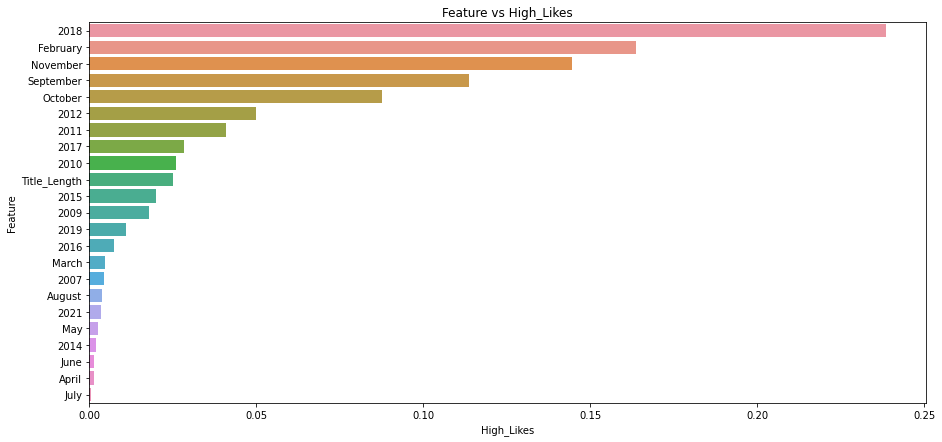

In [82]:
Feature_Importance = Feature_Importance[Feature_Importance.High_Likes>0]
plt.figure(figsize=(15,7))
sns.barplot(x=Feature_Importance.High_Likes,y=Feature_Importance.index)
plt.title('Feature vs High_Likes')
plt.xlabel('High_Likes')
plt.ylabel('Feature')
plt.show()
plt.show()

In [83]:
Authors = TED[['author','views','likes','Title_Length']]
Authors = Authors.groupby(by='author').mean()
Authors.head()

,views,likes,Title_Length
author,,,
B.E.A.T. NYC,3200.0,98.0,5.0
Beautyrest,60000.0,1800.0,3.0
Belle and Sebastian,23000.0,690.0,7.0
Butterscotch,31000.0,933.0,4.0
Climbing PoeTree,12000.0,367.0,4.0


In [84]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
col = Authors.columns
Authors_Clust = scaler.fit_transform(Authors)
Authors_Clust = pd.DataFrame(Authors_Clust,columns=col)
Authors_Clust.head()

,views,likes,Title_Length
0,-0.608213,-0.610749,-0.821869
1,-0.590250,-0.592952,-1.646613
2,-0.601951,-0.604559,0.002876
3,-0.599421,-0.602018,-1.234241
4,-0.605430,-0.607936,-1.234241


In [85]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    n = len(X) 
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H
hopkins(Authors_Clust)

0.9964248431302544

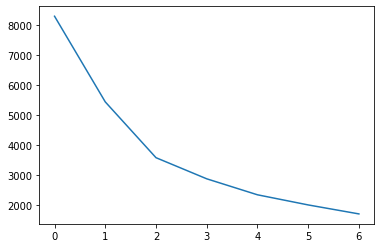

For n_clusters=2, the silhouette score is 0.8098003544646686
For n_clusters=3, the silhouette score is 0.42864300786558
For n_clusters=4, the silhouette score is 0.4626948984057889
For n_clusters=5, the silhouette score is 0.40096976643794247
For n_clusters=6, the silhouette score is 0.4157717180498653
For n_clusters=7, the silhouette score is 0.3995000316438194
For n_clusters=8, the silhouette score is 0.3700461706998626


In [86]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(Authors_Clust)
    
    ssd.append(kmeans.inertia_)
    
plt.plot(ssd)
plt.show()

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(Authors_Clust)
    
    cluster_labels = kmeans.labels_
    
    silhouette_avg = silhouette_score(Authors_Clust, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

In [87]:
kmeans = KMeans(n_clusters=4,max_iter=100)
kmeans.fit(Authors_Clust)

KMeans(max_iter=100, n_clusters=4)

In [88]:
Authors['Cluster_ID'] = kmeans.labels_
Authors.head()

,views,likes,Title_Length,Cluster_ID
author,,,,
B.E.A.T. NYC,3200.0,98.0,5.0,1
Beautyrest,60000.0,1800.0,3.0,1
Belle and Sebastian,23000.0,690.0,7.0,1
Butterscotch,31000.0,933.0,4.0,1
Climbing PoeTree,12000.0,367.0,4.0,1


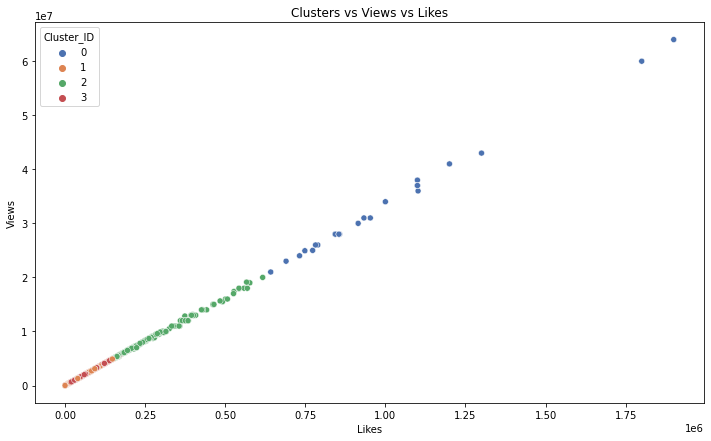

In [89]:
plt.figure(figsize=(12,7))
sns.scatterplot(x=Authors.likes,y=Authors.views,hue=Authors.Cluster_ID,palette='deep')
plt.title('Clusters vs Views vs Likes')
plt.xlabel('Likes')
plt.ylabel('Views')
plt.show()

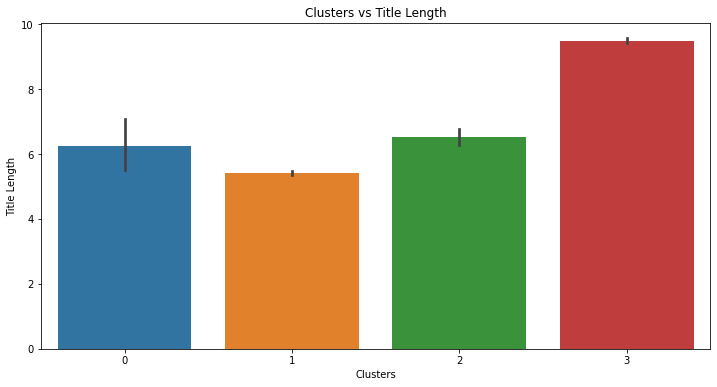

,views,likes,Title_Length
author,,,
B.E.A.T. NYC,3200.0,98.0,5.0
Beautyrest,60000.0,1800.0,3.0
Belle and Sebastian,23000.0,690.0,7.0
Butterscotch,31000.0,933.0,4.0
Climbing PoeTree,12000.0,367.0,4.0


In [90]:
plt.figure(figsize=(12,6))
sns.barplot(y=Authors.Title_Length,x=Authors.Cluster_ID)
plt.title('Clusters vs Title Length')
plt.ylabel('Title Length')
plt.xlabel('Clusters')
plt.show()

Best_Authors = ['Amy Cuddy', 'Angela Lee Duckworth', 'Apollo Robbins', 'Brené Brown', 'Cameron Russell', 'Celeste Headlee', 'Chris Anderson (TED)', 'Dan Pink', 'David Blaine', 'Graham Shaw', 'Hyeonseo Lee', 'Jill Bolte Taylor', 'Kelly McGonigal', 'Mary Roach', 'Mel Robbins', 'Michael Mauser', 'Pamela Meyer', 'Robert Waldinger', 'Sam Berns', 'Shawn Achor', 'Simon Sinek', 'Susan Cain', 'Tim Urban', 'Tom Thum']
len(Best_Authors)
Authors.drop('Cluster_ID',axis=1,inplace=True)
Authors.head()

In [91]:
Best_Authors = Authors[Authors.index.isin(Best_Authors)]
len(Best_Authors)

24

In [92]:
Best_Authors.head()

,views,likes,Title_Length
author,,,
Amy Cuddy,64000000.0,1900000.0,8.0
Angela Lee Duckworth,25000000.0,773000.0,7.0
Apollo Robbins,31000000.0,933000.0,4.0
Brené Brown,36000000.0,1102000.0,3.5
Cameron Russell,38000000.0,1100000.0,8.0


In [93]:
scaler = StandardScaler()
col = Best_Authors.columns
Best_Authors_Clust = scaler.fit_transform(Best_Authors)
Best_Authors_Clust = pd.DataFrame(Best_Authors_Clust,columns=col)
Best_Authors_Clust.head()

,views,likes,Title_Length
0,2.970055,2.966594,0.948156
1,-0.766131,-0.716469,0.404194
2,-0.191333,-0.193585,-1.227692
3,0.287665,0.358711,-1.499673
4,0.479264,0.352175,0.948156


In [94]:
hopkins(Best_Authors_Clust)

0.9744033954100028

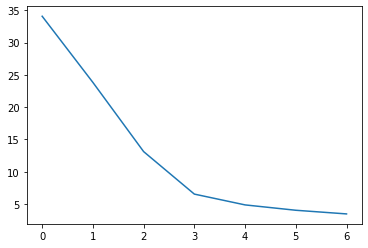

In [95]:
hopkins(Best_Authors_Clust)
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(Best_Authors_Clust)
    
    ssd.append(kmeans.inertia_)
    
plt.plot(ssd)
plt.show()

In [96]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(Best_Authors_Clust)
    
    cluster_labels = kmeans.labels_
    
    silhouette_avg = silhouette_score(Best_Authors_Clust, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.6151006683861578
For n_clusters=3, the silhouette score is 0.446479031822667
For n_clusters=4, the silhouette score is 0.48183334583925
For n_clusters=5, the silhouette score is 0.5128123891036692
For n_clusters=6, the silhouette score is 0.4389821089046732
For n_clusters=7, the silhouette score is 0.428032523421446
For n_clusters=8, the silhouette score is 0.35673203600694486


In [97]:
kmeans = KMeans(n_clusters=3,max_iter=100)
kmeans.fit(Best_Authors_Clust)

KMeans(max_iter=100, n_clusters=3)

In [98]:
Best_Authors['Cluster_ID'] = kmeans.labels_
Best_Authors.head()

,views,likes,Title_Length,Cluster_ID
author,,,,
Amy Cuddy,64000000.0,1900000.0,8.0,2
Angela Lee Duckworth,25000000.0,773000.0,7.0,1
Apollo Robbins,31000000.0,933000.0,4.0,1
Brené Brown,36000000.0,1102000.0,3.5,1
Cameron Russell,38000000.0,1100000.0,8.0,0


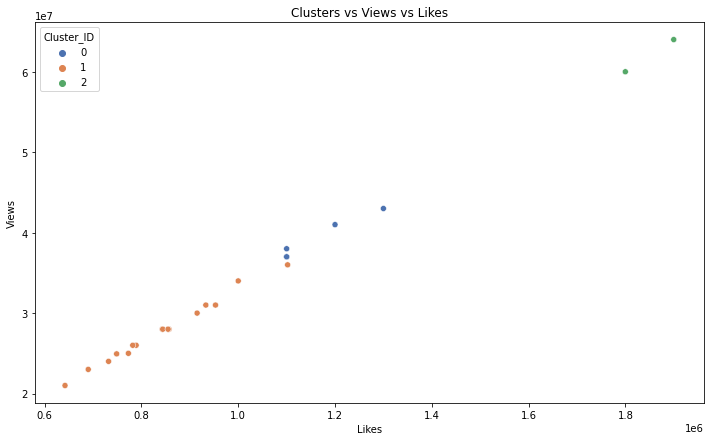

In [99]:
plt.figure(figsize=(12,7))
sns.scatterplot(x=Best_Authors.likes,y=Best_Authors.views,hue=Best_Authors.Cluster_ID,palette='deep')
plt.title('Clusters vs Views vs Likes')
plt.xlabel('Likes')
plt.ylabel('Views')
plt.show()

In [102]:
print('Best Cluster 3:',list(Best_Authors[Best_Authors.Cluster_ID==2].index))

Best Cluster 3: ['Amy Cuddy', 'Tim Urban']


In [103]:
Word = pd.DataFrame()

Final_Words.remove('')
Final_Words.remove('...')
Final_Words.remove('3')
Final_Words.remove('AS')
Final_Words

['LIFE',
 'FUTURE',
 'WORLD',
 'COULD',
 'SHOULD',
 'CHANGE',
 'HELP',
 'MAKE',
 'CLIMATE',
 'ART',
 'NEED',
 'POWER',
 'SOLVE',
 'PEOPLE',
 'BRAIN',
 'BETTER',
 'HISTORY',
 'MORE',
 'LIKE',
 'GET',
 'SCIENCE',
 'NOT',
 'WHEN',
 'WORK',
 'ONE',
 'WAY',
 'WAYS',
 'HAVE',
 'GLOBAL',
 'HUMAN',
 'STORY',
 'TIME',
 'HEALTH',
 "IT'S",
 'RIDDLE?',
 "DON'T",
 'SECRET',
 'DOES',
 'INTO',
 'TEACH',
 'LOVE',
 "LET'S",
 'GOOD']

In [104]:
Word['Word'] =  Final_Words
Word['views'] = [(TED[i]*TED['views']).sum()/TED[i].sum() for i in Final_Words]
Word['likes'] = [(TED[i]*TED['likes']).sum()/TED[i].sum() for i in Final_Words]
Word = Word.groupby('Word').mean()
Word.head()

,views,likes
Word,,
ART,1.585373e+06,48072.289157
BETTER,2.363893e+06,71912.797101
BRAIN,3.388427e+06,104137.183099
CHANGE,1.589787e+06,48412.237624
CLIMATE,1.413689e+06,43068.011364


In [105]:
scaler = StandardScaler()
col = Word.columns
Word_Clust = scaler.fit_transform(Word)
Word_Clust = pd.DataFrame(Word_Clust,columns=col)
Word_Clust.head()

,views,likes
0,-0.889439,-0.898767
1,0.219099,0.219831
2,1.677938,1.731801
3,-0.883154,-0.882816
4,-1.133902,-1.133567


In [106]:
hopkins(Word_Clust)

0.9570864345188104

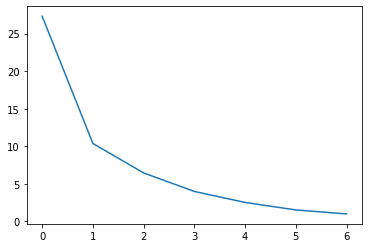

In [107]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(Word_Clust)
    
    ssd.append(kmeans.inertia_)
    
plt.plot(ssd)
plt.show()

In [108]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(Word_Clust)
    
    cluster_labels = kmeans.labels_
    
    silhouette_avg = silhouette_score(Word_Clust, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5871197702491343
For n_clusters=3, the silhouette score is 0.6425797051252077
For n_clusters=4, the silhouette score is 0.6377046290150408
For n_clusters=5, the silhouette score is 0.5726054699828957
For n_clusters=6, the silhouette score is 0.5664075466442747
For n_clusters=7, the silhouette score is 0.5858046618031973
For n_clusters=8, the silhouette score is 0.6037047796109835


In [109]:
kmeans = KMeans(n_clusters=3,max_iter=100)
kmeans.fit(Word_Clust)

KMeans(max_iter=100, n_clusters=3)

In [110]:
Word['Cluster_ID'] = kmeans.labels_
Word.head()

,views,likes,Cluster_ID
Word,,,
ART,1.585373e+06,48072.289157,0
BETTER,2.363893e+06,71912.797101,2
BRAIN,3.388427e+06,104137.183099,1
CHANGE,1.589787e+06,48412.237624,0
CLIMATE,1.413689e+06,43068.011364,0


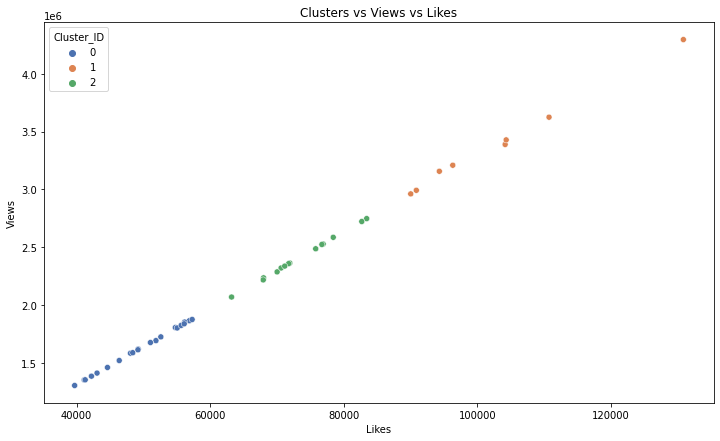

In [111]:
plt.figure(figsize=(12,7))
sns.scatterplot(x=Word.likes,y=Word.views,hue=Word.Cluster_ID,palette='deep')
plt.title('Clusters vs Views vs Likes')
plt.xlabel('Likes')
plt.ylabel('Views')
plt.show()

In [112]:
print('Cluster 1',list(Word[Word.Cluster_ID==0].index))

Cluster 1 ['ART', 'CHANGE', 'CLIMATE', 'COULD', 'FUTURE', 'GLOBAL', 'HEALTH', 'HELP', 'HUMAN', 'INTO', "IT'S", "LET'S", 'LIKE', 'MORE', 'NEED', 'SCIENCE', 'SHOULD', 'TEACH', 'TIME', 'WHEN', 'WORLD']


In [113]:
print('Cluster 2',list(Word[Word.Cluster_ID==1].index))

Cluster 2 ['BRAIN', 'GOOD', 'HAVE', 'PEOPLE', 'POWER', 'RIDDLE?', 'SECRET', 'SOLVE']


In [114]:
print('Cluster 3',list(Word[Word.Cluster_ID==2].index))

Cluster 3 ['BETTER', 'DOES', "DON'T", 'GET', 'HISTORY', 'LIFE', 'LOVE', 'MAKE', 'NOT', 'ONE', 'STORY', 'WAY', 'WAYS', 'WORK']
